### Machine Learning

#### Classification with SciKit-Learn

##### Clustering Models

In [1]:
#Import useful Libraries

#for loading DataFrame and some manipulation
import pandas as pd

#for visualization
import matplotlib.pyplot as plt

#to build the Clustering model
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Import Dataset

filepath = r"C:\Users\damil\Documents\2024 Skills\Data Science_Python\python-for-data-science-dataset\python-for-data-science-course-main\Mall_Customers.csv"

#create DataFrame
m_mcdf = pd.read_csv(filepath)


#Dataset overview
m_mcdf.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Dataset overview

m_mcdf.shape

(200, 5)

In [4]:
#Dataset overview

m_mcdf.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Dataset overview

m_mcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Dataset overview

m_mcdf.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
#Feature Selection

#create a new Dataframe (containing features of interest) from the original Dataframe
X = m_mcdf[['Annual Income (k$)', 'Spending Score (1-100)']]

#to check
X.head()
#print(x.isnull().sum()) 
#print(type(x))   # Ensure it is a DataFrame
#print(x.dtypes)  # Check data types of the columns
#x = x.astype(float)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
#elbow method: to find the optimal (choose the right) number of clusters

#wcss is the sum of the square distance between each data point and its nearest centroid. 
#it is a measure of how well the datapoints are clustered around their respective centroids
#create an empty list
wcss = []

#kmeans should iterate through 10 clusters, so as to make a decision as to the right number of cluster for the model.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 48)  # Create model instance
    kmeans.fit(X)                                                         # Fit the features with kmeans (corrected variable name)
    wcss.append(kmeans.inertia_)                                          # Append (adds elements to a list) the inertia (WCSS) to the list

#init: is an argument that helps the algorithm select or choose a better starting point, instead of random. 
    #if set to random, then it randomly selects the starting point.

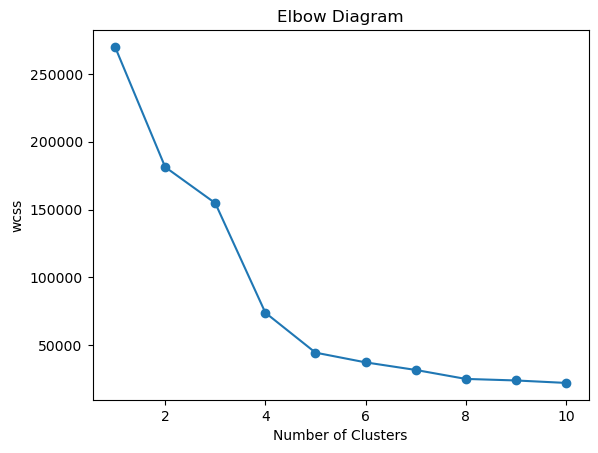

In [9]:
#to plot wcss against all the points

x = range(1, 11)
y = wcss
plt.plot(x, y, marker = "o")
plt.title("Elbow Diagram")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [10]:
#determine the point of optimal cluster based on the slope at the point of inflection

optimalCluster = 5

In [11]:
#to initialize the KMeans instance

kmeans = KMeans(n_clusters = optimalCluster, init="k-means++", random_state = 48)  

#to get the predicted cluster for each value of X
y_kmeans = kmeans.fit_predict(X)                                                         
#to check all the clusters obtained
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [12]:
#quick overview: what is currently in X

print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [13]:
#to add a new column containing the y_kmean for each row of X
X['Cluster'] = y_kmeans

X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


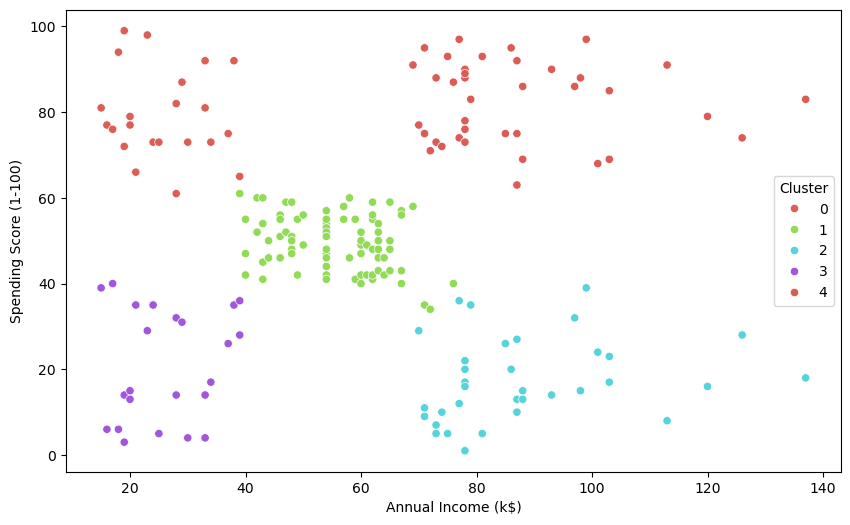

In [14]:
#Visualize the clusters

#seaborn is another visualization library
import seaborn as sns

x = "Annual Income (k$)"
y = "Spending Score (1-100)"

plt.figure(figsize = (10, 6))
sns.scatterplot(data = X, x = x, y = y, hue ="Cluster", palette = "hls")
#hue:to colorcode according to cluster
plt.show()

In [20]:
#to cheeck what cluster a new customer would belong

print(kmeans.predict([[26, 50]])) 

[3]
